# Kaggle Titanic Competition 
## Author: Matheus Nogueira
 

### Goal: 

Predict, for each entry of the dataset (each person inside Titanic) wheter it has survived or not based on the features available.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Importing the datasets available on Kaggle

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's remove the column that is our target -> "Survived"


In [15]:
y = train.Survived
X = train.drop("Survived",axis=1)
X.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's analise each one of our features

In [13]:
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerID -> numeric -> a list from 1 to len -> it is not useful for the model, but it is for us to identify the passengers that survived

PClass -> categorical -> indicates the class of the passenger aboard the ship -> may impact our prediction

Name -> name of the passenger -> we will ignore, since Jack does not have more chance to survive because of his name

Sex -> categorical -> male or female -> must be encoded -> may be important

Age -> numerical -> age of the passenger -> may be important

SibSp -> number of siblings/spouse aboard -> may influence prediction

Parch -> number of parents/child aboard -> may influence prediction

Ticket -> id of the ticket -> seems too random -> will be ignored

Fare -> numeric -> passage fare -> higher fares may mean higher class that may influence in the prediction

Cabin -> number of the cabin -> if there is a pattern may be useful 

Embarked -> port of embarcation -> don't think it is useful, but since I don't have a good reason to drop it, it will stay


After creeating and evaluationg the models it will be done a feature importance analysis to see which features could be ignored.

In [17]:
X = X.drop(["Name", "Ticket"],axis=1)

Let's dive into each of the features and look for outliears, missing values and more

PClass

Missing values total: 0
Missing Value Percentage: 0.00


C:\Users\matno\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


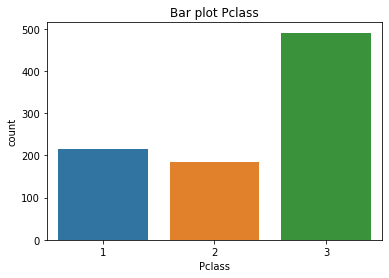

In [61]:
sns.countplot(X.Pclass).set(title="Bar plot Pclass");

print("Missing values total: %d\nMissing Value Percentage: %.2f"
        %(X.Pclass.isna().sum(),
        X.Pclass.isna().sum()/X.Pclass.shape[0]))

Conclusions:

Most of the passengers are from 3rd Class, which makes sense, since the first and second classes are more expensive.
There is no missing values -> excelent!!

In [ ]:
# Function that makes all the feature engineering done in the steps above -> useful because we will have to do the same with the test set

def pre_process(df):
    X = df.drop("Survived",axis=1) #the actual test set does not have this column, so it must be commented
    y = df.Survived

    X = X.drop(["Name", "Ticket"],axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)